# RECIPE FOR MACHINE LEARING by QUANTSTORY

### Regression Problems
* This version Without Validation, and tuning

**Step Machine Learning ง่ายๆ ใครๆก็ทำได้**

แค่ 4 Step หลักๆเท่านั้น
1. Data Acquistion
2. EDA
3. Data Preperation
4. Train and evaluate Model 

## 1st Step: Data Acquistion

- Import Data
- ดู Data เพิ่งต้น

## 1.1 Load Data 
* ใน Case นี้เราใช้ Bostonhousing Data
* Y คือ medv : median house price 
* X คือ feature ต่างๆ  13 features
* ข้อมูลมี 506 Row , 14 Columns

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

df = boston

- ใน case นี้เราจงใจใส่ mission value เข้าไป 

In [2]:
df.loc[9:30,'PTRATIO'] = None

## 1.2 Look at Data

- First Glance 
- What is the Data Type?
- Any missing Value?
- How Data Behave? (Briefly )

### ดู Missing Value + Type ด้วย .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  484 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### ดู Row แรกๆ ด้วย .head()

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### ดู Stat เบื้องต้น ด้วย .describe()

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,484.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.387810,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.137014,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.225000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,18.850000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1.3 Define Problem + Measurement
- Measure How Good our solution is
- เราต้องการ Predict Medv (Median House Price)
- เนื่องจากเป็น Numerical Data -> Regression Problem
- เราจะใช้ RMSE เป็น Measurement 


In [6]:
X_col = [i for i in df.columns if i not in ['MEDV']]
y = df[['MEDV']]
X = df[X_col]


## 1.4 Split Train Test
* เราจะ ไม่ยุ่งกะ Test Dataset ไปอีกนาน
* เป้าหมายเราคือสร้าง Model ที่ Generalized ที่สุด 
* ไม่ควรมีข้อมูลจาก Test set รั่วเข้ามาใน Analysis + สร้าง Model
* เราควรจะ Treat Testset ว่า เป็น out of sample -> **ยุ่งกะมันให้น้อยที่สุด**
* ต้อง FAIR ห้าม CHEAT ห้าม โกง!!! 


* คำสั่ง train_test_split จาก sklearn สามารถ split ได้

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,
                               y,
                               train_size=0.8,
                               random_state=789, 
                               shuffle=True)



In [8]:
print("X_train: " ,X_train.shape)
print("y_train: " ,y_train.shape)
print("X_test: " ,X_test.shape)
print("y_test: " ,y_test.shape)

X_train:  (404, 13)
y_train:  (404, 1)
X_test:  (102, 13)
y_test:  (102, 1)


## 2nd Step EDA (Exploratory Data Analysis)
- Visualized
- X มี Distribution แบบไหน
- Y มี Distribution แบบไหน
- Relationship X & Y เป็นยังไง


- พยายามทำแค่ บน **Train Dataset (อย่าไปยุ่งกะ Test)** 

In [9]:
training =  pd.merge(y_train, X_train, left_index=True, right_index=True)  
print(training.shape)

(404, 14)


### snspairplot

* X มี Distribution แบบไหน
* Y มี Distribution แบบไหน
* Relationship X & Y เป็นยังไง


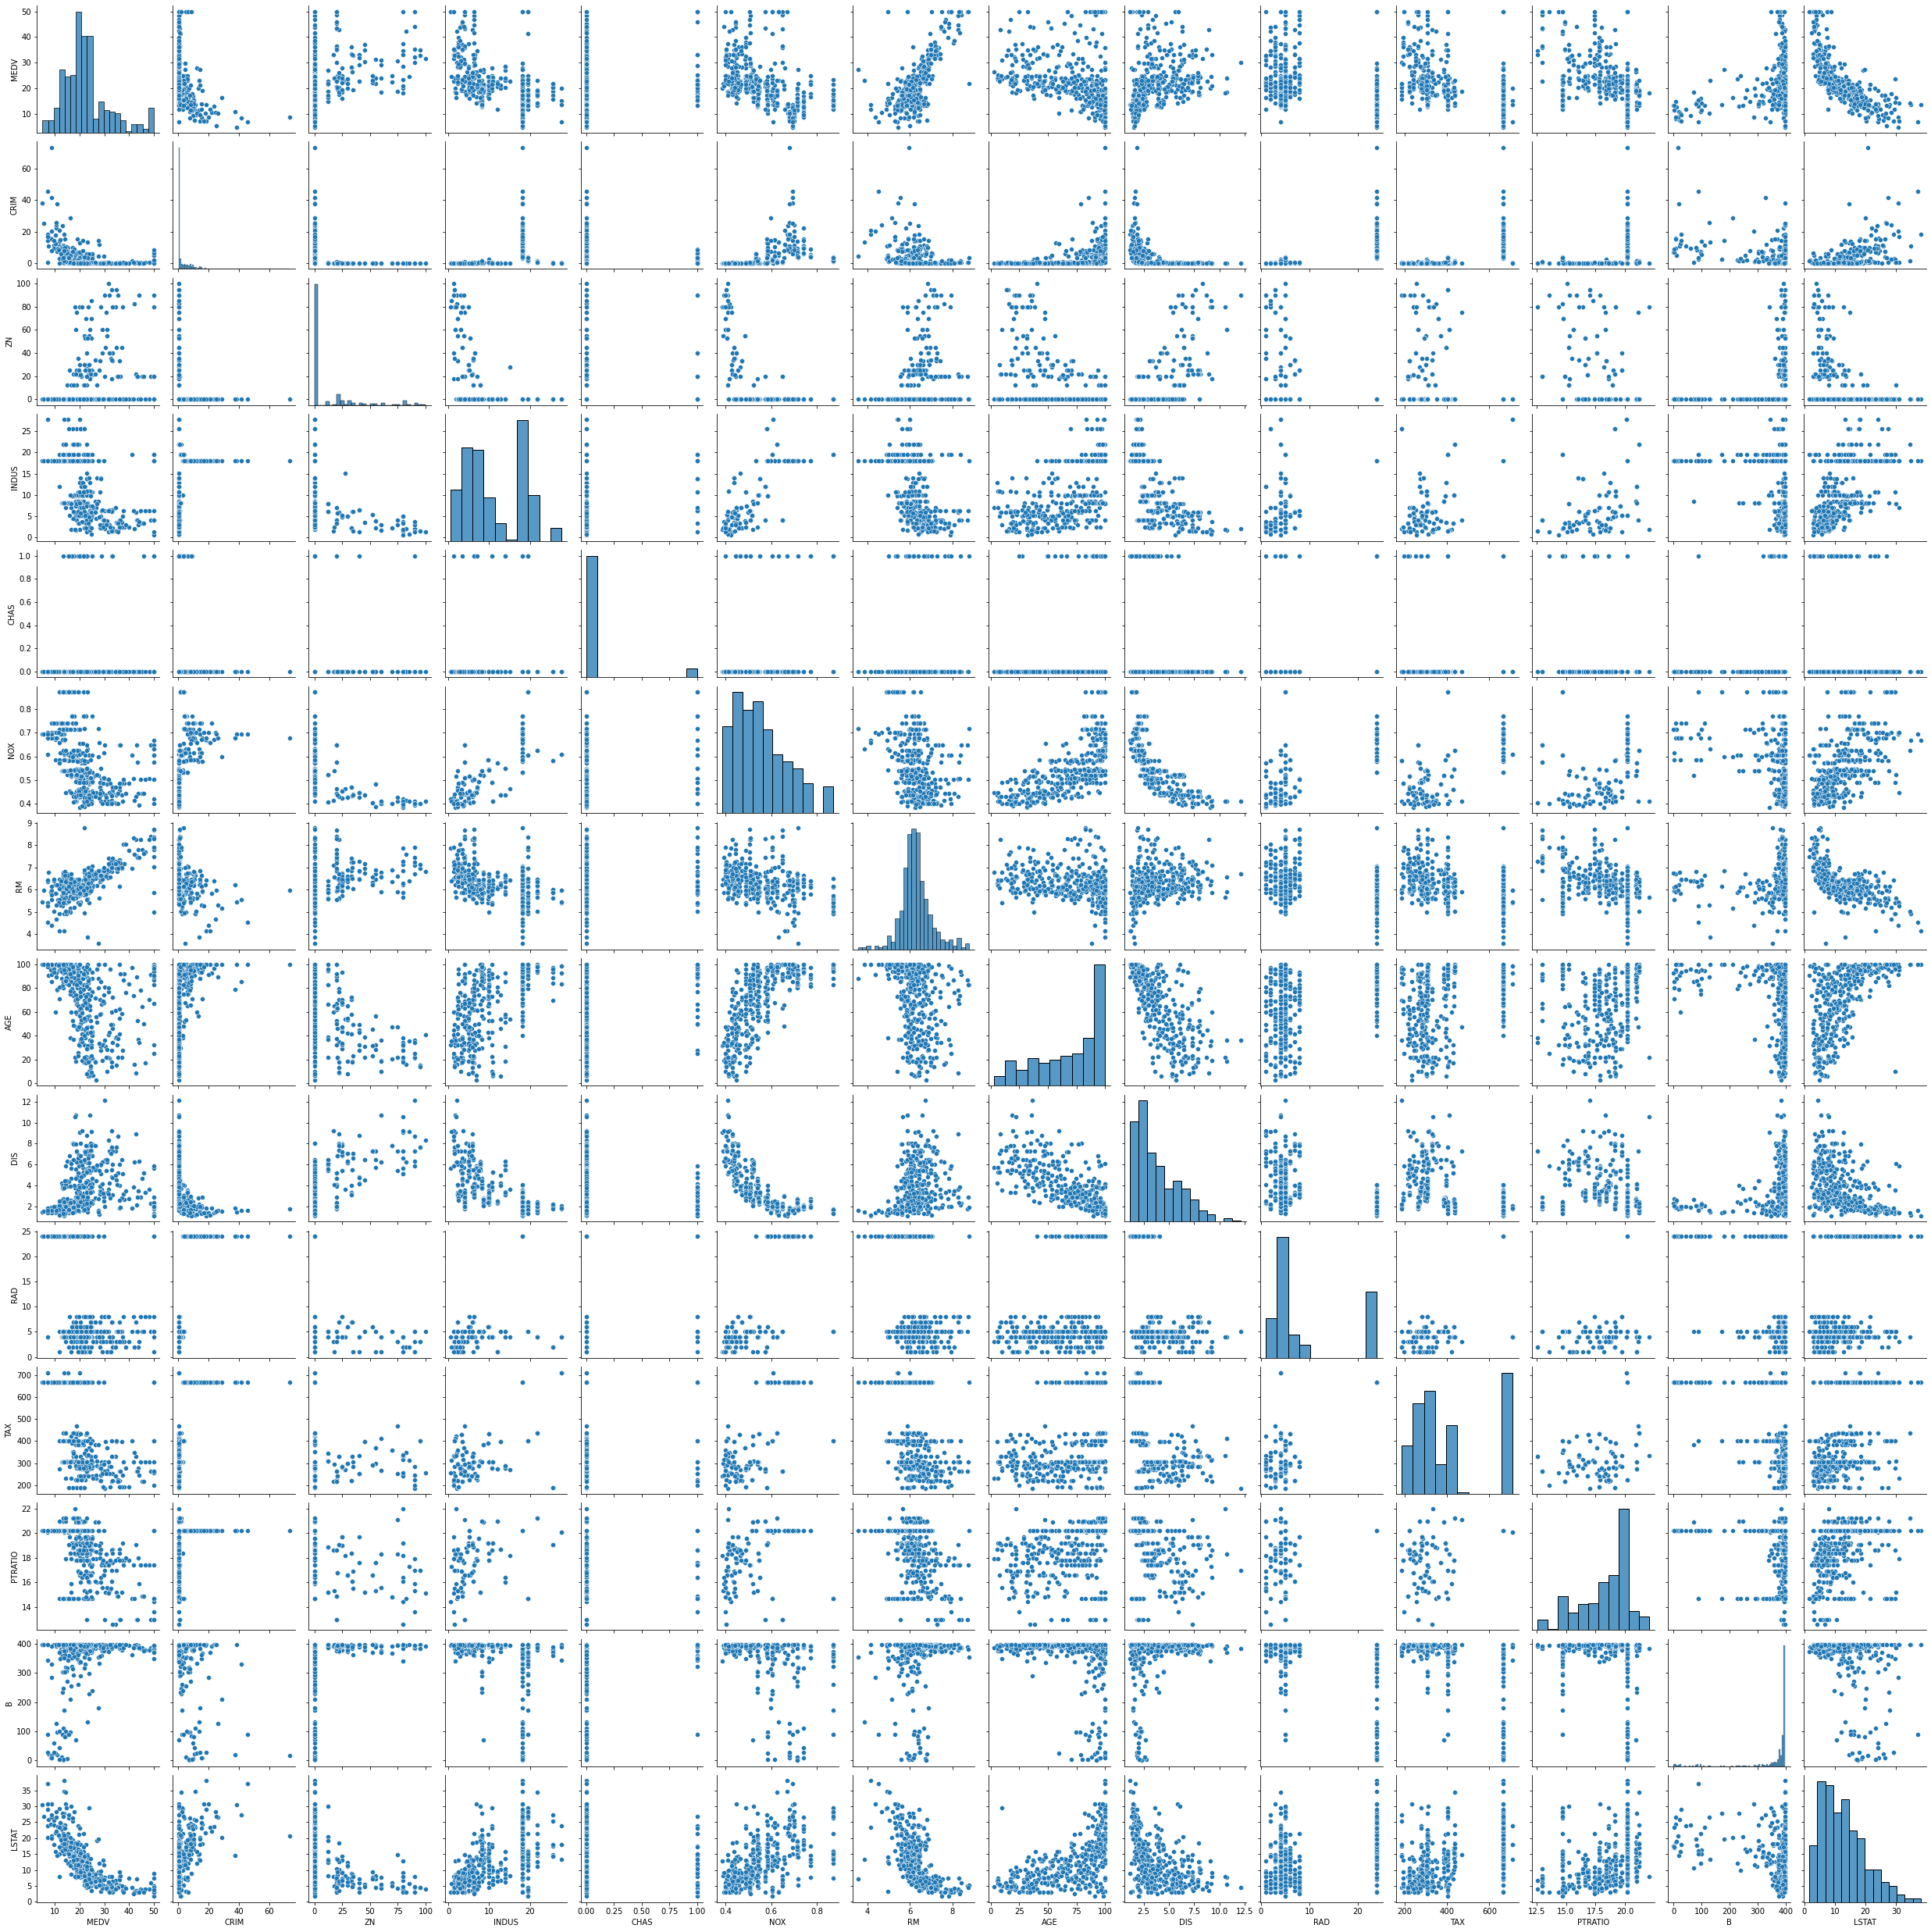

In [10]:
import seaborn as sns
sns.pairplot(training)

### Scatter Plot

* Relationship X & Y เป็นยังไง


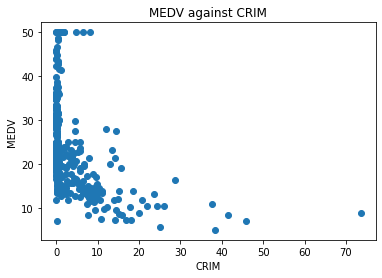

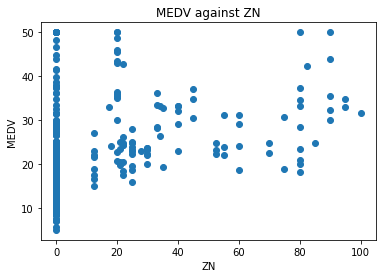

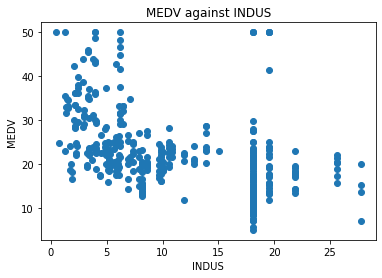

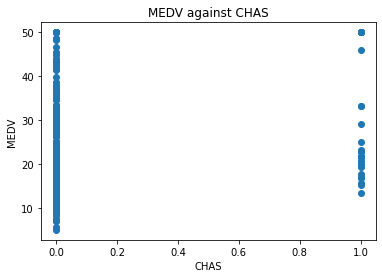

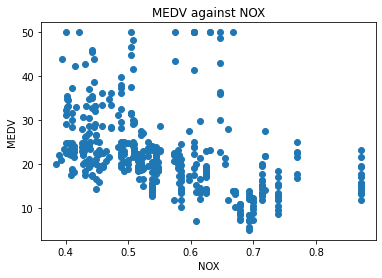

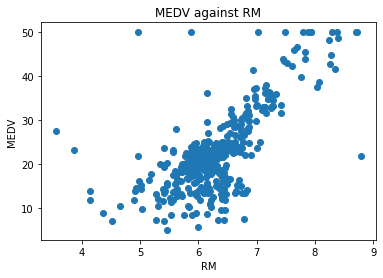

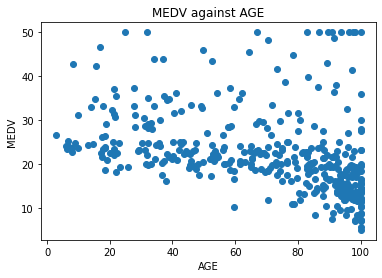

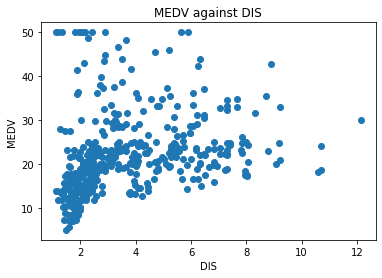

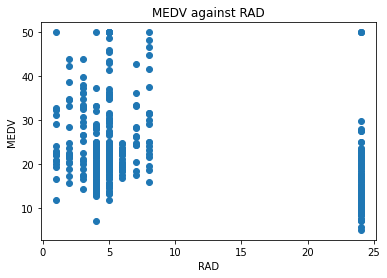

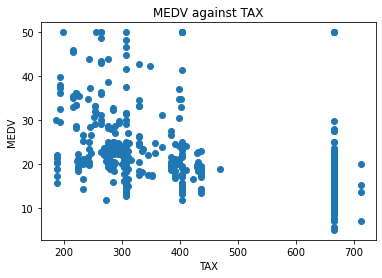

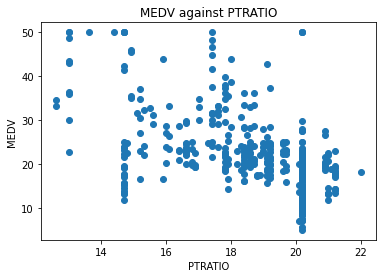

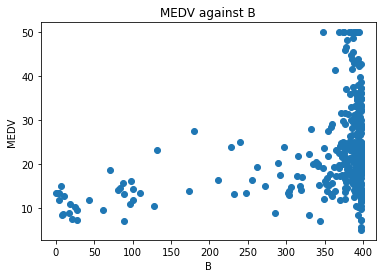

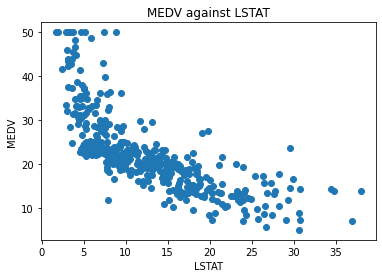

In [11]:
import matplotlib.pyplot as plt
for i in X_train.columns:
    plt.scatter(x=  X_train[i] ,y = y_train)
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("MEDV")
    plt.title("MEDV against {x}".format( x = i))
    plt.show()

### Histrogram Plot

* X มี Distribution แบบไหน

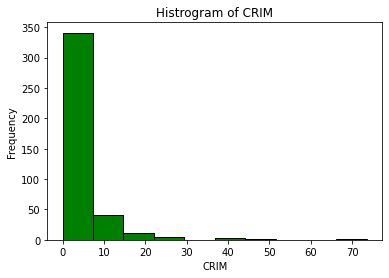

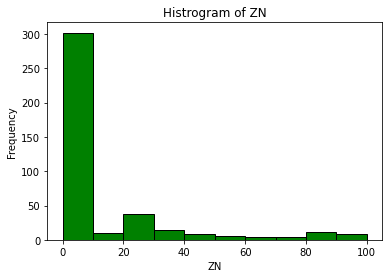

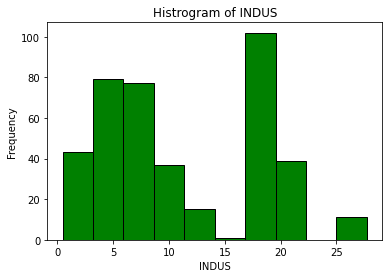

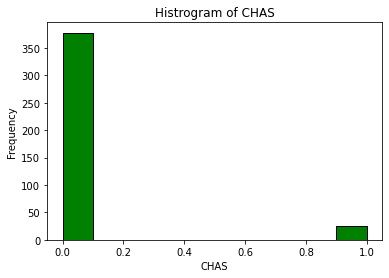

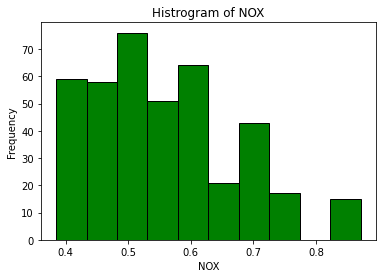

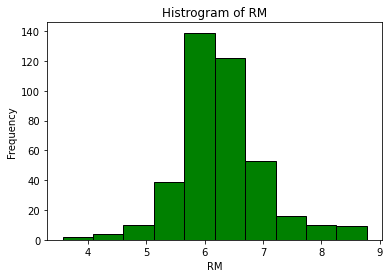

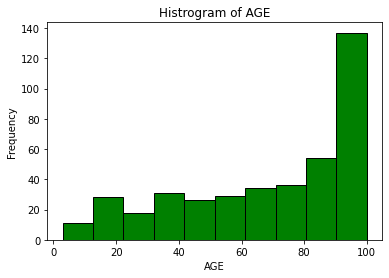

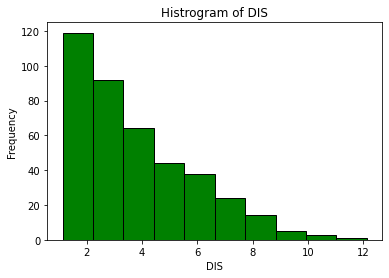

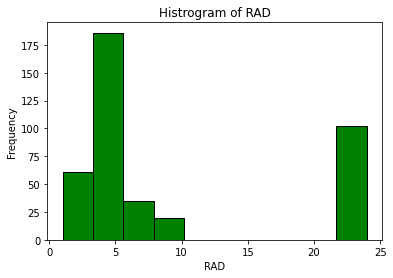

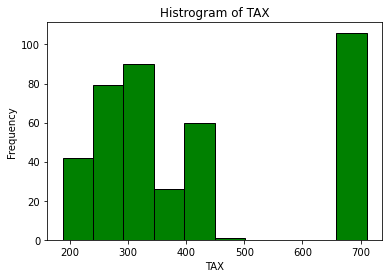

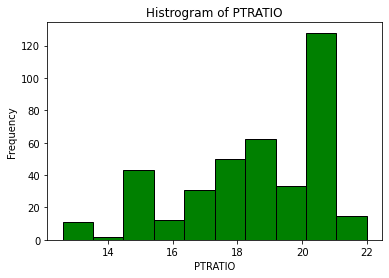

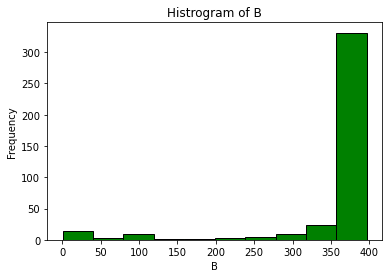

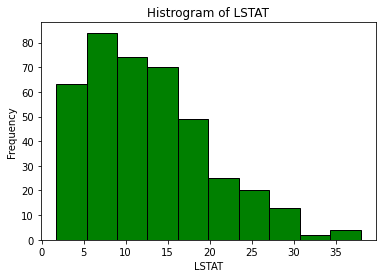

In [12]:

import matplotlib.pyplot as plt
for i in X_train.columns:
    plt.hist(X_train[i], color = 'green', edgecolor = 'black')
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("Frequency")
    plt.title("Histrogram of {x}".format( x = i))
    plt.show()

### Histrogram Plot

* Y มี Distribution แบบไหน

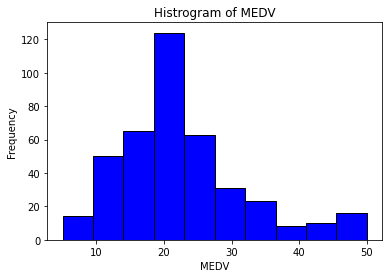

In [13]:
import matplotlib.pyplot as plt
plt.hist(y_train, color = 'blue', edgecolor = 'black')
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.title("Histrogram of MEDV")
plt.show()

### Correlation Plot

* Relationship X & Y เป็นยังไง
* Relationship X & X เป็นยังไง

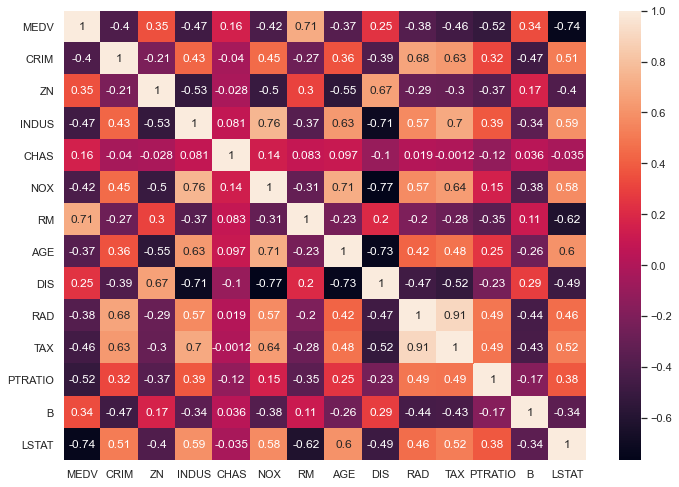

In [14]:
import seaborn as sns
corrMatrix = training.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

sns.reset_orig()

ตัวอย่าง Insight หลังจาก plot

* Lstat และ RM มี relaionship กับ MEDV มากที่สุด (Lstat: Negatively relationship , RM: Positively Relationship)  
* Medv Distributed ค่อนข้างดี ไม่มี ปัญหามาก
* CRIM , Dis , LSTAT ข้อมูลค่อนข้าง Right Skewed
* Unit หลายๆตัวมีค่าไม่ใกล้กัน Dis มีค่า 0 ถึง 12 , zn มีค่า 0 ถึง 100

## ลองแก้ right skew [LSTAT, DIS, CRIM]

* Take Log

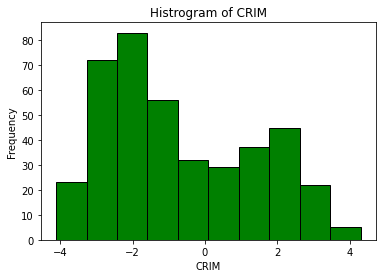

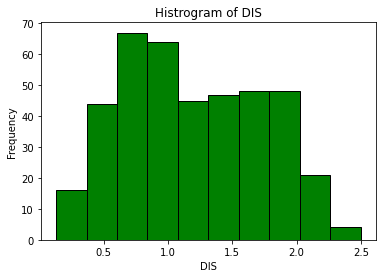

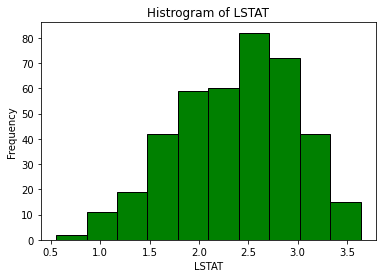

In [15]:
col_rs = ["CRIM" , "DIS", "LSTAT"]

import matplotlib.pyplot as plt
for i in col_rs:
    plt.hist(np.log(X_train[i]+0.01), color = 'green', edgecolor = 'black')
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("Frequency")
    plt.title("Histrogram of {x}".format( x = i))
    plt.show()

* ใส่ Log แล้วสวยขึ้น 

## 3rd Step Prep data

- **หลังจาก Step ข้างบนเราน่าจะมี Idea การ Clean + Prep ข้อมูล**
* Mission Value ? 
* Need Scaling ? 
* Need Feature Transformation ? e.g. Dummy variable, Text data? 


## 3.1: Cleaning

- เข้าสังเกตได้ว่า PTRATIO มี mission value อยู่
- จาก Distribution ของ PTRATIO ไม่ค่อย Normal เท่าไหร่
- ใช้ Median ในการ Imputed

### **COMMON MISTAKE!!**
- หากเรา Impute ด้วย Mean จาก Dataset ทั้งหมด เช่น Impute ก่อน Split Data train test
## **ผิด!!**



หากเรา Impute Missing Value ด้วย บาง Parameter e.g. Mean Median
- **การคิด Parameter (Mean, median) เราควรอึงจาก Training Dataset เท่านั้น ห้ามคิดจาก Dataset ทั้งหมด** 
- เรา Asumme ว่าจะไม่ยุ่ง Test Data ในการคิด Parameter
- **เพื่อไม่ให้ Information รั่วจาก Test Dataset**

สมมุติเรา Impute missing value ด้วย mean 
* เราคิด Mean จากแค่ Train Dataset เท่านั้น
* และนำ Mean จาก Train Dataset ไปแทน Missing Value ทั้ง Train และ Test


sklearn.impute.SimpleImputer สามารถดใช้ Impute Missing Value ได้

In [16]:
from sklearn.impute import SimpleImputer

# calculate parameter from only train data
imp_median = SimpleImputer( strategy='median')
imp_median.fit(X_train)

# transform x train
X_train_im = imp_median.transform(X_train)
X_train_im = pd.DataFrame(X_train_im, index=X_train.index , columns = X_train.columns)

# transform x test
X_test_im = imp_median.transform(X_test)
X_test_im = pd.DataFrame(X_test_im, index=X_test.index , columns = X_test.columns)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 358 to 51
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  387 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 64.2 KB


In [18]:
X_train_im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 358 to 51
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 64.2 KB


In [19]:
# From
# PTRATIO  387 non-null    float64 
# to
# PTRATIO  404 non-null    float64

## 3.2 Transformation
- Any Non Numeric Data?
- Non linearity?
- Different in Units? 
- Skewed? 
- **คิด Parameter/Model จาก แค่ Training Dataset เหมือนเดิม , ห้าม Cheat** 
- แล้วนำ Parameter/Model นั้นไป Applied ทั้ง Train และ Test

### จากเมื่อกี้ใส่ log 3 columns

In [20]:
col_rs = ["CRIM" , "DIS", "LSTAT"]

X_train_lg = X_train_im.copy()
X_test_lg = X_test_im.copy()

# transform X test
X_train_lg[col_rs] = np.log(X_train_lg[col_rs] + 0.01)

# transform X test
X_test_lg[col_rs] = np.log(X_test_lg[col_rs] + 0.01)

### เนื่องจาก Unit ไม่ใกล้กัน 
* เราจะ scale Data
* ให้ Unit ใกล้กัน 
* Standard Scaler ทำให้ Data mean = 0 , sd = 1

sklearn.preprocessing.StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

# fit แค่ train dataset
scaler = StandardScaler()
scaler.fit(X_train_lg)

# transform train dataset
X_train_sc = scaler.transform(X_train_lg)
X_train_sc = pd.DataFrame(X_train_sc, index=X_train_lg.index, columns = X_train_lg.columns)


# transform test dataset
X_test_sc = scaler.transform(X_test_lg)
X_test_sc  = pd.DataFrame(X_test_sc, index=X_test_lg.index, columns = X_test_lg.columns)


In [22]:
np.round(X_train_sc.describe(),2)

# mean 0 , sd 1 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.67,-0.47,-1.56,-0.26,-1.47,-3.80,-2.37,-1.99,-0.98,-1.31,-2.79,-3.93,-3.03
25%,-0.82,-0.47,-0.87,-0.26,-0.89,-0.55,-0.82,-0.83,-0.63,-0.75,-0.49,0.20,-0.68
50%,-0.27,-0.47,-0.22,-0.26,-0.16,-0.10,0.32,-0.08,-0.51,-0.45,0.27,0.38,0.11
75%,0.97,0.09,1.00,-0.26,0.58,0.45,0.89,0.88,1.70,1.56,0.85,0.43,0.77
max,2.46,4.05,2.39,3.81,2.70,3.50,1.11,2.44,1.70,1.83,1.71,0.44,2.09


In [23]:
np.round(X_test_sc.describe(),2)

# mean in test ไม่ 0  เป้ะๆ 
# std in test ไม่ 1 เป้ะๆ 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.05,0.21,-0.05,0.10,-0.07,0.04,-0.09,-0.01,0.08,0.07,-0.03,-0.01,-0.04
std,1.08,1.23,0.97,1.16,0.97,0.91,1.03,1.03,1.06,1.05,1.00,1.03,0.98
min,-1.46,-0.47,-1.44,-0.26,-1.41,-2.31,-2.24,-1.92,-0.98,-1.27,-2.79,-3.91,-2.80
25%,-0.82,-0.47,-0.90,-0.26,-0.95,-0.57,-1.08,-0.85,-0.63,-0.78,-0.47,0.20,-0.79
50%,-0.39,-0.47,-0.33,-0.26,-0.22,-0.10,0.28,0.09,-0.51,-0.39,0.13,0.37,-0.06
75%,1.06,0.43,1.00,-0.26,0.75,0.56,0.87,0.68,1.70,1.56,0.85,0.43,0.72
max,2.55,3.82,2.39,3.81,2.70,2.45,1.11,2.18,1.70,1.83,1.71,0.44,1.93


# 4 Train Data
* Create Baseline Model
* เลือก Model ตาม Hypothesis
* Fit Model
* Evaluate Model
* Version นี้ไม่มี Validation Set
* Error Analysis

## 4.1 Baseline Model
* Average 
* Mode 
* Simple Model
* ในที่นี้เราใช้ Average

In [24]:
# We need to calculate parameter from only train dataset 
y_train_avgpred = np.average(y_train)
y_test_avgpred = y_train_avgpred.copy()

print(y_train_avgpred)
print(y_test_avgpred)

22.51064356435644
22.51064356435644


## 4.2 Select and FIt model 
* ในที่นี้เราเลือก Linear regression
* Fit แค่ Train เท่านั้น

sklearn.linear_model.LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

# Fit only train data
reg = LinearRegression()
reg.fit(X_train_sc, y_train)

# Predict Train
y_train_regpred = reg.predict(X_train_sc)

# Predict Test
y_test_regpred = reg.predict(X_test_sc)


## 4.3 Measure Performance
* Regression Problem
* เราใช้ RMSE 
* เทียบ RMSE model เรากับ Baseline model
* Prediction Plot เทียบกับ Actual Data
* RMSE ยิ่งน้อย ยิ่งดี (ส่วนใหญ่)

sklearn.metrics.mean_squared_error แล้วมาหา square root

In [26]:
from sklearn.metrics import mean_squared_error

# Baseline Model 
rmse_train_avg = mean_squared_error(y_train ,np.repeat(y_train_avgpred, len(y_train))  )
rmse_test_avg = mean_squared_error(y_test ,np.repeat(y_test_avgpred, len(y_test))  )

# Linear regression Model
rmse_train_reg = mean_squared_error(y_train ,y_train_regpred  )
rmse_test_reg = mean_squared_error(y_test ,y_test_regpred  )

print("In  Sample Baseline Avg RMSE = " ,  rmse_train_avg)
print("Out Sample Baseline Avg RMSE = " ,  rmse_test_avg)

print("In  Sample Linear reg   RMSE = " ,  rmse_train_reg)
print("Out Sample Linear reg   RMSE = " ,  rmse_test_reg)

In  Sample Baseline Avg RMSE =  85.11382235810213
Out Sample Baseline Avg RMSE =  81.67215415131352
In  Sample Linear reg   RMSE =  15.889148230463807
Out Sample Linear reg   RMSE =  25.42295785273805


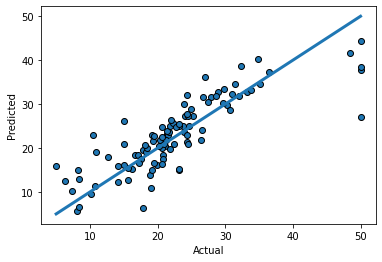

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_regpred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

**Linear regression เรา Beat Baseline Model ทั้ง Insample and Out of Sample**

## 4.4: Error analysis
* ดูว่า เรา Predict ผิดตรงไหน 
* ดู RMSE อย่างเดียวอาจไม่ใช่ Indicator ที่ดี
* Plot Graph Error vs Features



In [28]:
error = y_train - y_train_regpred

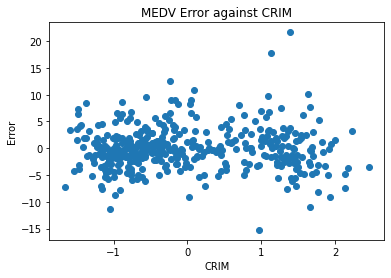

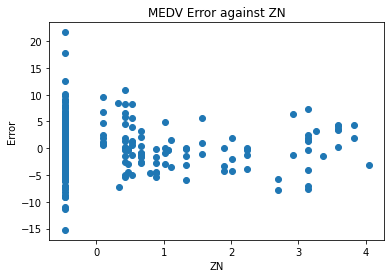

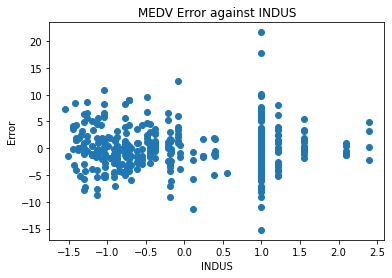

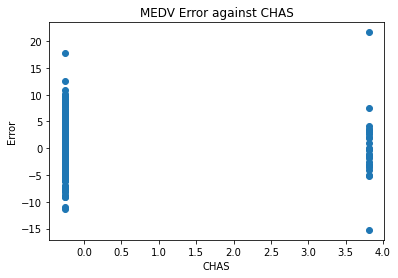

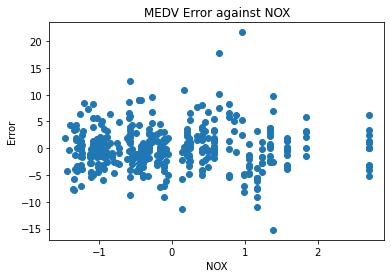

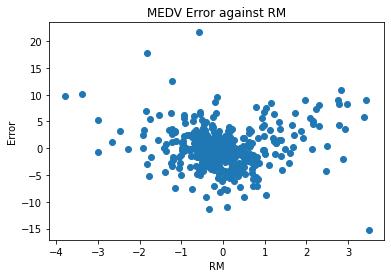

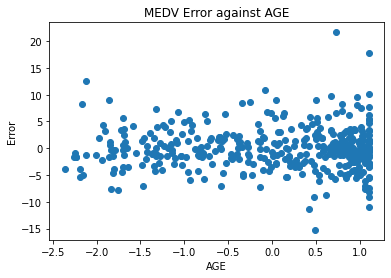

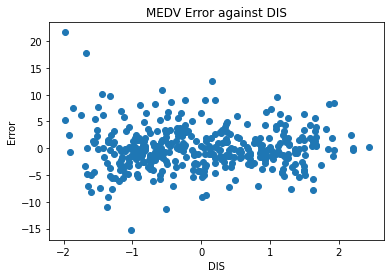

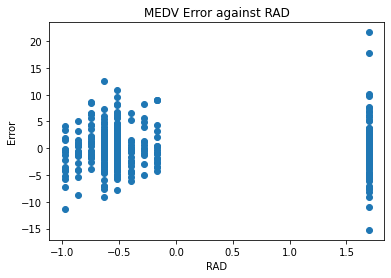

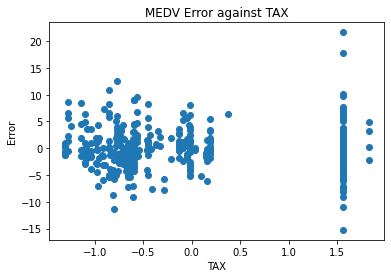

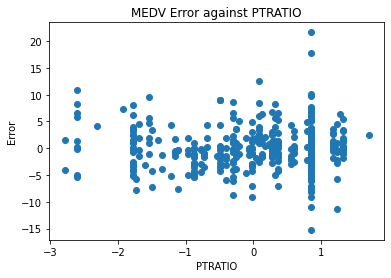

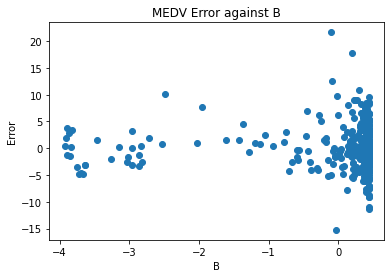

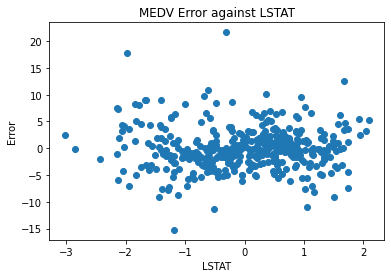

In [29]:
import matplotlib.pyplot as plt
for i in X_train_sc.columns:
    plt.scatter(x=  X_train_sc[i] ,y = error)
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("Error")
    plt.title("MEDV Error against {x}".format( x = i))
    plt.show()

### ตัว Graph MEDV vs RM 
* Error เป็นลบตรงกลาง
* Error เป็นบวกข้างๆ 
* ควรใส่ Curvature ของ Feature RM เข้าไป

# ใส่ rm กำลัง 2 กำลัง 3 เข้าไป

In [30]:
# ใส่ rm กำลัง 2 กำลัง 3 เข้าไป

X_train_lg['RM_2'] = X_train_lg['RM']**2
X_train_lg['RM_3'] = X_train_lg['RM']**3

X_test_lg['RM_2'] = X_test_lg['RM']**2
X_test_lg['RM_3'] = X_test_lg['RM']**3


In [31]:
from sklearn.preprocessing import StandardScaler

# fit แค่ train dataset
scaler = StandardScaler()
scaler.fit(X_train_lg)

# transform train dataset
X_train_sc = scaler.transform(X_train_lg)
X_train_sc = pd.DataFrame(X_train_sc, index=X_train_lg.index, columns = X_train_lg.columns)


# transform test dataset
X_test_sc = scaler.transform(X_test_lg)
X_test_sc  = pd.DataFrame(X_test_sc, index=X_test_lg.index, columns = X_test_lg.columns)


In [32]:
from sklearn.linear_model import LinearRegression

# Fit only train data
reg = LinearRegression()
reg.fit(X_train_sc, y_train)

# Predict Train
y_train_regpred = reg.predict(X_train_sc)

# Predict Test
y_test_regpred = reg.predict(X_test_sc)


In [33]:
from sklearn.metrics import mean_squared_error

# Baseline Model 
rmse_train_avg = mean_squared_error(y_train ,np.repeat(y_train_avgpred, len(y_train))  )
rmse_test_avg = mean_squared_error(y_test ,np.repeat(y_test_avgpred, len(y_test))  )

# Linear regression Model
rmse_train_reg = mean_squared_error(y_train ,y_train_regpred  )
rmse_test_reg = mean_squared_error(y_test ,y_test_regpred  )

print("In  Sample Baseline Avg RMSE = " ,  rmse_train_avg)
print("Out Sample Baseline Avg RMSE = " ,  rmse_test_avg)

print("In  Sample Linear reg   RMSE = " ,  rmse_train_reg)
print("Out Sample Linear reg   RMSE = " ,  rmse_test_reg)

In  Sample Baseline Avg RMSE =  85.11382235810213
Out Sample Baseline Avg RMSE =  81.67215415131352
In  Sample Linear reg   RMSE =  13.707186679488192
Out Sample Linear reg   RMSE =  22.97429536001021


### RMSE น้อยลง ERROR ANALYSIS ได้ผล!!!
* In sample จาก 15.889 เหลือ 13.707
* Out of sample จาก 25.423 เหลือ 22.974


# Next Recipe For ML with Validation Set and Tuning 
* ถึงตอนนี้เราไม่ได้แตะการ Tune Model แม้แต่นิดเดียว 
* การ Tune Model จะเพิ่ม Performance ให้การ Model เรา
    - โดยการ Search Hyperparameter ที่ดีดีสุดต่อ Model ของเรามาให้
* **แต่เราไม่สามารถนำ Test DataSet มา Tune Model ได้**
    - เนื่องจาก การ Tune แบบนี้จะ Overfit Test dataset
    - บวกกับปล่อยให้ Information Test set รั่วเข้ามา
    - เราจะพยายามแต่ Test Set ให้น้อยที่สุด
* เราจำเป็นต้องมี Validation Set หรือ Cross Vadalition
